In [2]:
import os
import cv2
import random
import collections
import numpy as np
import pandas as pd
import seaborn as sns
from shutil import copy
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as img
import matplotlib.pyplot as plt
from shutil import copytree, rmtree
from collections import defaultdict
from tensorflow.keras import models
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D

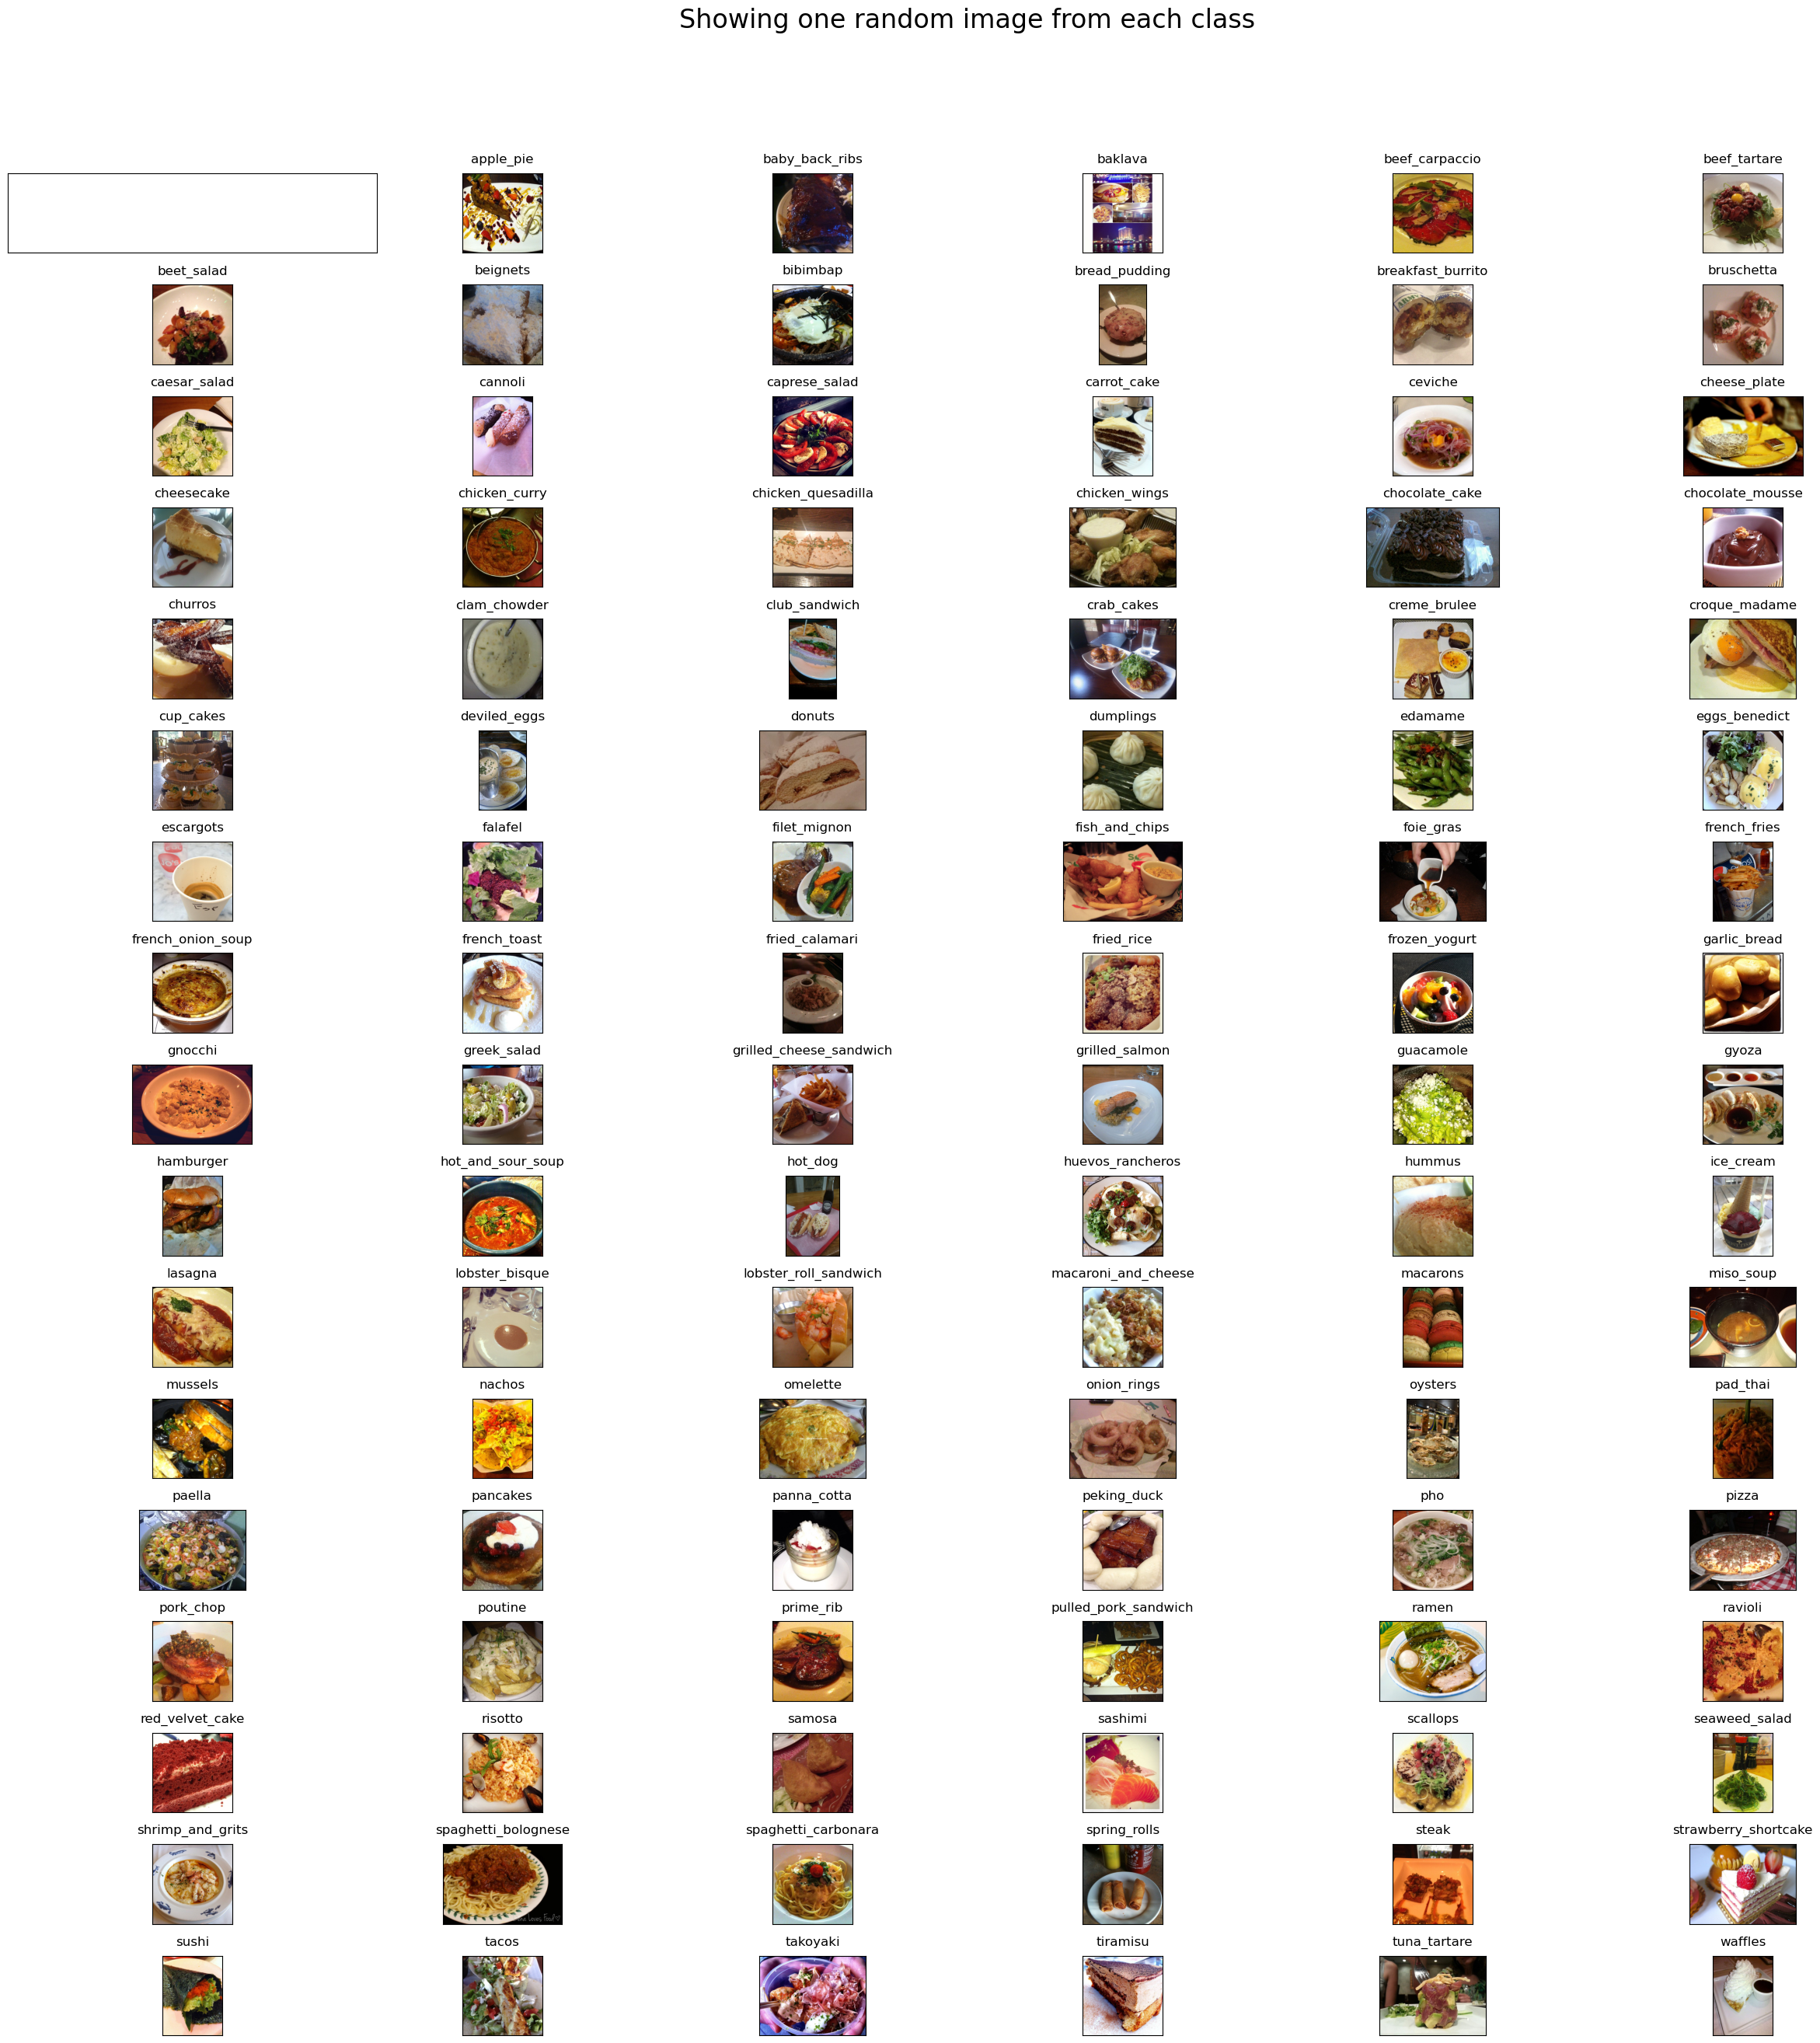

In [4]:
# Define the number of rows and columns
rows = 17
cols = 6

# Create a figure and grid of subplots
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24)
data_dir ="D:\\archive\\food-101\\food-101\\images"

# Returns sorted list of food class directories
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0

# Loop through each subplot position
for i in range(rows):
  for j in range(cols):
    try:
    # Select the current food class
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    #  Get a random image from the selected food class    
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) 
    food_selected_random = np.random.choice(food_selected_images) 
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    # Display the image in the subplot
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)

# Remove x and y ticks from all subplots
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [6]:
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
    
# Read and process image paths from the file
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

# Copy images to destination directories organized by class
  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")


In [14]:
print("Creating train data...")
prepare_data('D:\\archive\\food-101\\food-101\\meta\\train.txt', 'D:\\archive\\food-101\\food-101\\images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [16]:
print("Creating test data...")
prepare_data('D:\\archive\\food-101\\food-101\\meta\\test.txt', 'D:\\archive\\food-101\\food-101\\images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [22]:
del foods_sorted[0]
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [8]:
def dataset_mini(food_list, src, dest):
    
# Removes the destination if it exists and then create a new one
  if os.path.exists(dest):
    rmtree(dest)
  os.makedirs(dest)

# Copy directories listed in food_list from source to destination
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [10]:
# Define the source and destination directories for training and testing data
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'

In [12]:
def predict_class(model, images, food_list, show=True):

# Ensure images is a list
    if isinstance(images, np.ndarray):
        images = [images]

    for img in images:

# Load and preprocess the image if a file path is provided
        if isinstance(img, str):
            img = image.load_img(img, target_size=(200, 200))
            img = image.img_to_array(img)
        elif isinstance(img, np.ndarray):
            img = cv2.resize(img, (200, 200))

# Prepare image for model prediction
        img = img.astype('float32')
        img = np.expand_dims(img, axis=0)
        img /= 255.0

# Predict the class of the image
        pred = model.predict(img)
        index = np.argmax(pred)
        food_list.sort()
        pred_value = food_list[index]

# Display the image and prediction if show is True
        if show:
            plt.imshow(img[0])
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

In [14]:
food_list=["club_sandwich","donuts","french_fries","spring_rolls","pizza","ice_cream","dumplings","samosa", "cup_cakes", "omelette"]
len(food_list)

10

In [32]:
print("Creating training data folder with new classes...")
dataset_mini(food_list, src_train, dest_train)

Creating training data folder with new classes...
Copying images into club_sandwich
Copying images into donuts
Copying images into french_fries
Copying images into spring_rolls
Copying images into pizza
Copying images into ice_cream
Copying images into dumplings
Copying images into samosa
Copying images into cup_cakes
Copying images into omelette


In [33]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into club_sandwich
Copying images into donuts
Copying images into french_fries
Copying images into spring_rolls
Copying images into pizza
Copying images into ice_cream
Copying images into dumplings
Copying images into samosa
Copying images into cup_cakes
Copying images into omelette


In [182]:
# Clear any previous session
K.clear_session()

# Model and data parameters
img_width, img_height = 200, 200
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 12000
nb_validation_samples = 4000
batch_size = 16

# Check if directories contain images
def check_directory(directory):
    if not os.path.exists(directory) or not os.listdir(directory):
        raise ValueError(f"The directory '{directory}' is empty or does not exist.")
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path) and not os.listdir(subdir_path):
            raise ValueError(f"The subdirectory '{subdir_path}' is empty.")

check_directory(train_data_dir)
check_directory(validation_data_dir)

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data augmentation for validation (only rescaling)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Debug: Print number of classes
num_classes_train = len(train_generator.class_indices)
num_classes_val = len(validation_generator.class_indices)
print(f"Number of classes in training data: {num_classes_train}")
print(f"Number of classes in validation data: {num_classes_val}")

# Ensure the number of classes is the same
assert num_classes_train == num_classes_val, "The number of classes in training and validation data must be the same."
n = num_classes_train

# Calculate steps per epoch
steps_per_epoch = nb_train_samples // batch_size
validation_steps = nb_validation_samples // batch_size

# Ensure there are validation steps
assert validation_steps > 0, "Validation steps should be greater than 0."

# Model definition
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)

# Output layer
predictions = Dense(n, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

# Model compilation
model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpointer = ModelCheckpoint(filepath='best_model_20class.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_16class.log')

# Model training
history_20class = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=30,
    verbose=1,
    callbacks=[csv_logger, checkpointer]
)

# Save the trained model
model.save('model_trained_16class.keras')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Number of classes in training data: 10
Number of classes in validation data: 10
Epoch 1/30
469/750 ━━━━━━━━━━━━━━━━━━━━ 5:24 1s/step - accuracy: 0.1878 - loss: 2.3574
Epoch 1: val_loss improved from inf to 1.53411, saving model to best_model_20class.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 670s 840ms/step - accuracy: 0.2283 - loss: 2.2765 - val_accuracy: 0.6016 - val_loss: 1.5341
Epoch 2/30
469/750 ━━━━━━━━━━━━━━━━━━━━ 6:50 1s/step - accuracy: 0.5247 - loss: 1.6107
Epoch 2: val_loss improved from 1.53411 to 0.97429, saving model to best_model_20class.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 746s 990ms/step - accuracy: 0.5385 - loss: 1.5640 - val_accuracy: 0.7444 - val_loss: 0.9743
Epoch 3/30
469/750 ━━━━━━━━━━━━━━━━━━━━ 5:24 1s/step - accuracy: 0.6495 - loss: 1.2094
Epoch 3: val_loss improved from 0.97429 to 0.75612, saving model to best_model_20class.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 605s 803ms/step - accuracy:

In [16]:
# Parameters
img_width, img_height = 200, 200
validation_data_dir = 'test_mini'
batch_size = 16
nb_validation_samples = 4000
validation_steps = nb_validation_samples // batch_size

In [18]:
# Data augmentation for validation (only rescaling)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Data generator for validation
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2500 images belonging to 10 classes.


In [20]:
# Load the trained model
model = load_model('model_trained_16class.keras')

In [22]:
# Read the CSV log File
log_file = 'history_16class.log'
history_df = pd.read_csv(log_file)

In [24]:
# Extract and print the final training and validation accuracy and loss
train_accuracy = (history_df['accuracy'].iloc[-1]*100)
val_accuracy = (history_df['val_accuracy'].iloc[-1]*100)
train_loss = (history_df['loss'].iloc[-1]*100)
val_loss = (history_df['val_loss'].iloc[-1]*100)
print(f"Final Training Accuracy: {train_accuracy} %")
print(f"Final Validation Accuracy: {val_accuracy} %")
print(f"Final Training Loss: {train_loss} %")
print(f"Final Validation Loss: {val_loss} %")

Final Training Accuracy: 94.77333426475523 %
Final Validation Accuracy: 90.2400016784668 %
Final Training Loss: 24.95492398738861 %
Final Validation Loss: 40.15742540359497 %


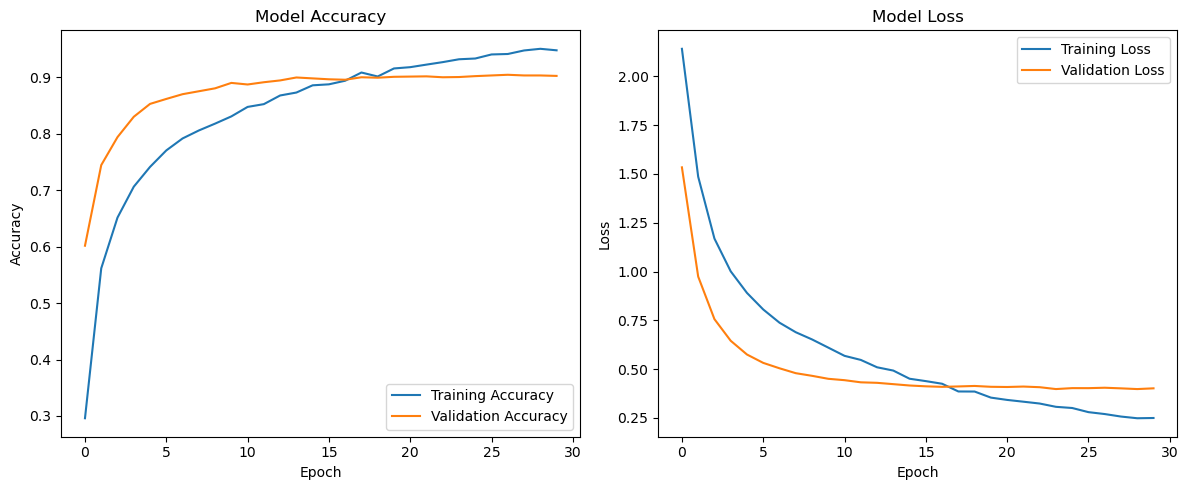

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [28]:
# Generate predictions on the validation data
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_steps, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = validation_generator.classes[:len(predicted_classes)]
class_labels = list(validation_generator.class_indices.keys())

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step


C:\Users\admin\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Overall Validation Accuracy: 90.24%


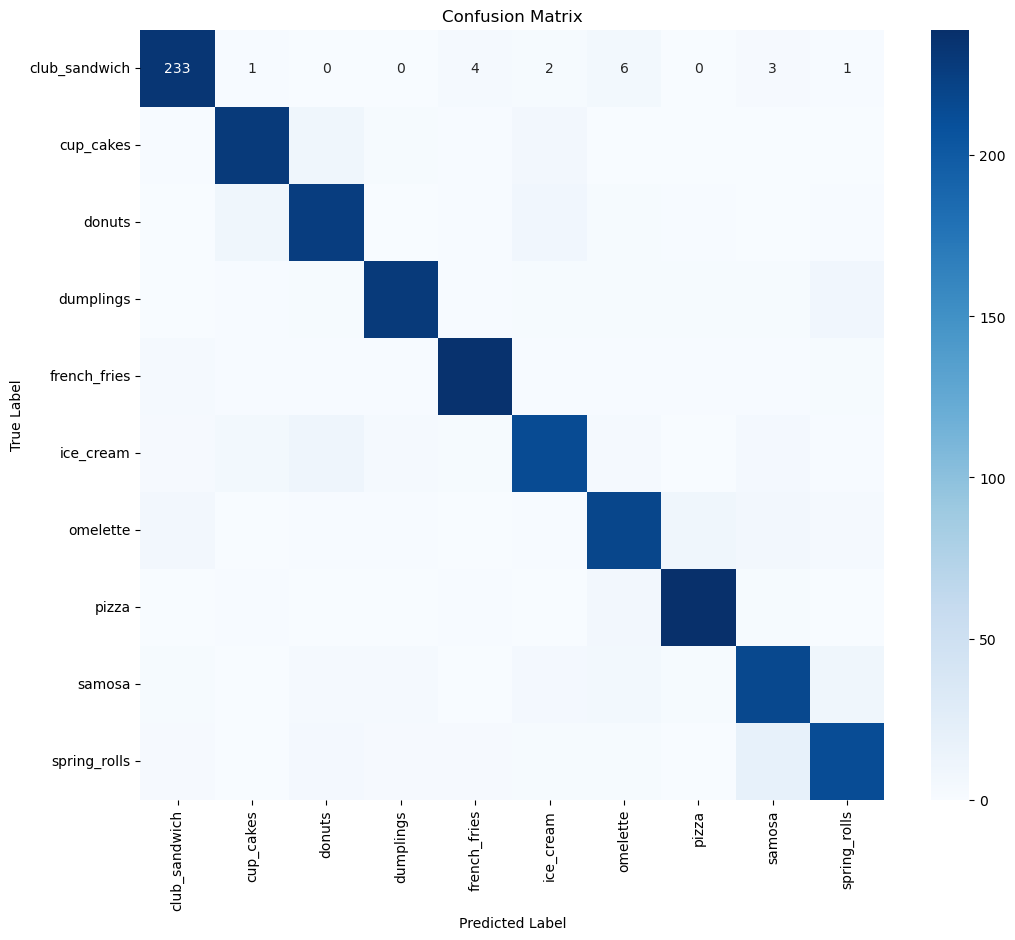

In [30]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print overall accuracy on validation set
overall_val_accuracy = (accuracy_score(true_classes, predicted_classes)*100)
print(f'Overall Validation Accuracy: {overall_val_accuracy}%')

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

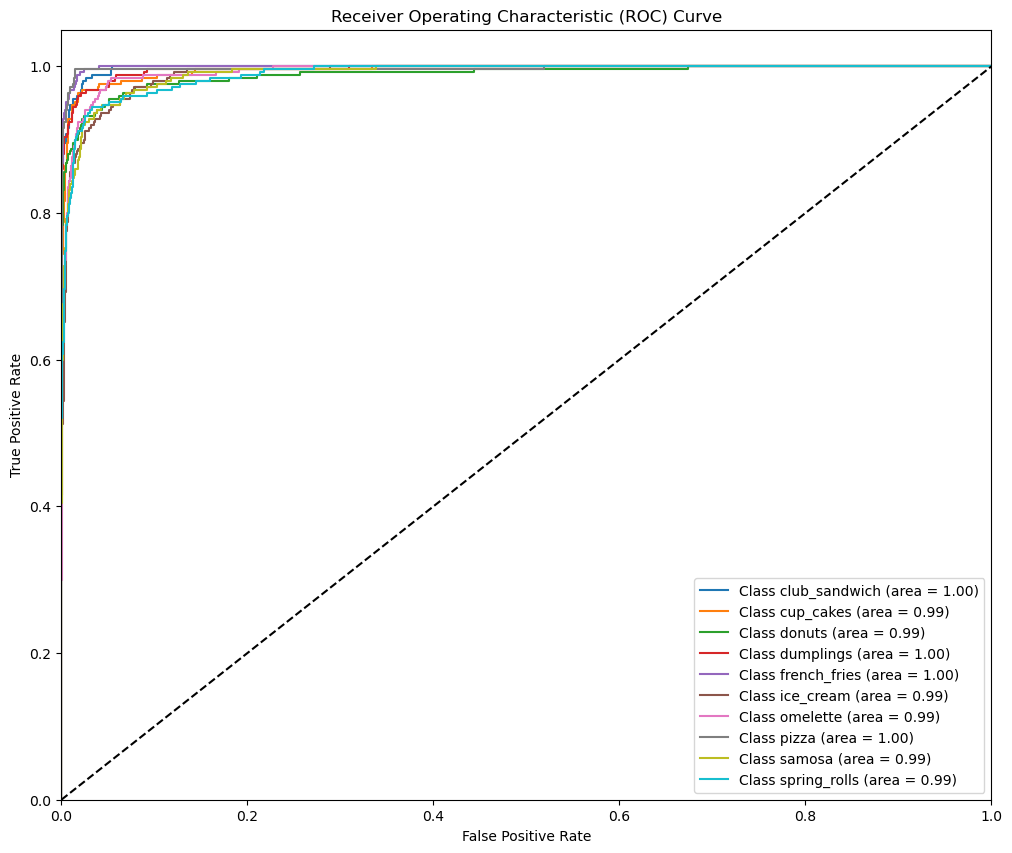

In [32]:
# Compute ROC curve and AUC
# Convert true classes to one-hot encoding
y_true = to_categorical(true_classes, num_classes=len(class_labels))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot ROC curve
plt.figure(figsize=(12, 10))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
# Print classification report
class_report = classification_report(true_classes, predicted_classes, target_names=list(validation_generator.class_indices.keys()))
print(class_report)

               precision    recall  f1-score   support

club_sandwich       0.92      0.93      0.93       250
    cup_cakes       0.92      0.92      0.92       250
       donuts       0.87      0.90      0.89       250
    dumplings       0.94      0.92      0.93       250
 french_fries       0.95      0.95      0.95       250
    ice_cream       0.88      0.86      0.87       250
     omelette       0.88      0.88      0.88       250
        pizza       0.94      0.96      0.95       250
       samosa       0.85      0.87      0.86       250
 spring_rolls       0.88      0.85      0.87       250

     accuracy                           0.90      2500
    macro avg       0.90      0.90      0.90      2500
 weighted avg       0.90      0.90      0.90      2500



In [36]:
%%time
# Loading the best saved model to make predictions
# K.clear_session()
model_best = load_model('best_model_20class.keras',compile = False)

CPU times: total: 750 ms
Wall time: 1.51 s


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


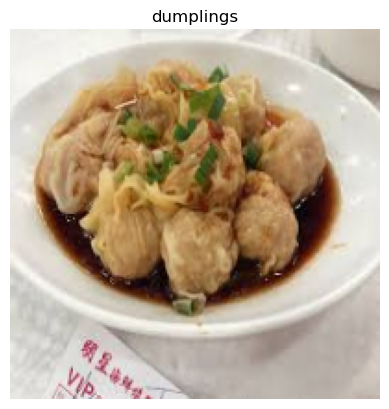

In [38]:
image=cv2.imread("D:\\dumplings.jpeg")
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predict_class(model_best, image, food_list)

In [40]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [42]:
# Step 2: Load Data
df = pd.read_csv('fooddex.csv')

In [44]:
# Step 3: Inspect Data
print(df.head(10)) 

  FoodCategory                  FoodItem per100grams Cals_per100grams  \
0  CannedFruit                Applesauce        100g           62 cal   
1  CannedFruit           Canned Apricots        100g           48 cal   
2  CannedFruit       Canned Blackberries        100g           92 cal   
3  CannedFruit        Canned Blueberries        100g           88 cal   
4  CannedFruit           Canned Cherries        100g           54 cal   
5  CannedFruit        Canned Cranberries        100g          178 cal   
6  CannedFruit  Canned Crushed Pineapple        100g           53 cal   
7  CannedFruit               Canned Figs        100g          107 cal   
8  CannedFruit     Canned Fruit Cocktail        100g           81 cal   
9  CannedFruit        Canned Fruit Salad        100g           50 cal   

  KJ_per100grams  
0         260 kJ  
1         202 kJ  
2         386 kJ  
3         370 kJ  
4         227 kJ  
5         748 kJ  
6         223 kJ  
7         449 kJ  
8         340 kJ  
9     

In [46]:
# Step 4: Data Cleaning
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 FoodCategory        0
FoodItem            0
per100grams         0
Cals_per100grams    0
KJ_per100grams      0
dtype: int64


In [48]:
# Data Cleaning
# Convert the per100grams column to numeric
df['per100grams'] = df['per100grams'].str.extract('(\d+)', expand=False).astype(int)

# Convert the Cals_per100grams column to numeric
df['Cals_per100grams'] = df['Cals_per100grams'].str.replace(' cal', '').astype(int)

# Convert the KJ_per100grams column to numeric
df['KJ_per100grams'] = df['KJ_per100grams'].str.replace(' kJ', '').astype(int)

In [50]:
df.drop_duplicates(inplace=True)

In [52]:
#converting to numeric
# Ensure proper cleaning and conversion
df['Cals_per100grams'] = df['Cals_per100grams'].astype(str).str.extract('(\d+)', expand=False)
df['Cals_per100grams'] = pd.to_numeric(df['Cals_per100grams'], errors='coerce')

df['KJ_per100grams'] = df['KJ_per100grams'].astype(str).str.extract('(\d+)', expand=False)
df['KJ_per100grams'] = pd.to_numeric(df['KJ_per100grams'], errors='coerce')

# Removing duplicates if any
df.drop_duplicates(inplace=True)

# Check for any unwanted columns
print(df.columns)

# Only select numeric columns for correlation matrix calculation
numeric_df = df[['Cals_per100grams', 'KJ_per100grams']]

# Correlation Analysis
correlation_matrix = numeric_df.corr()
print("Correlation matrix:\n", correlation_matrix)


Index(['FoodCategory', 'FoodItem', 'per100grams', 'Cals_per100grams',
       'KJ_per100grams'],
      dtype='object')
Correlation matrix:
                   Cals_per100grams  KJ_per100grams
Cals_per100grams               1.0             1.0
KJ_per100grams                 1.0             1.0


In [54]:
df.head()

FoodCategory             FoodItem  per100grams  Cals_per100grams  \
0  CannedFruit           Applesauce          100                62   
1  CannedFruit      Canned Apricots          100                48   
2  CannedFruit  Canned Blackberries          100                92   
3  CannedFruit   Canned Blueberries          100                88   
4  CannedFruit      Canned Cherries          100                54   

   KJ_per100grams  
0             260  
1             202  
2             386  
3             370  
4             227

In [56]:
df.describe()

per100grams  Cals_per100grams  KJ_per100grams
count       2224.0       2224.000000     2224.000000
mean         100.0        236.595773      993.683453
std            0.0        187.046990      785.591208
min          100.0          0.000000        0.000000
25%          100.0         82.000000      344.000000
50%          100.0        217.500000      913.500000
75%          100.0        344.000000     1445.000000
max          100.0       1009.000000     4238.000000

In [58]:
# Step 5: Data Analysis
# Summary Statistics
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)

Summary statistics:
        per100grams  Cals_per100grams  KJ_per100grams
count       2224.0       2224.000000     2224.000000
mean         100.0        236.595773      993.683453
std            0.0        187.046990      785.591208
min          100.0          0.000000        0.000000
25%          100.0         82.000000      344.000000
50%          100.0        217.500000      913.500000
75%          100.0        344.000000     1445.000000
max          100.0       1009.000000     4238.000000


In [60]:
df['FoodCategory'].nunique()

44

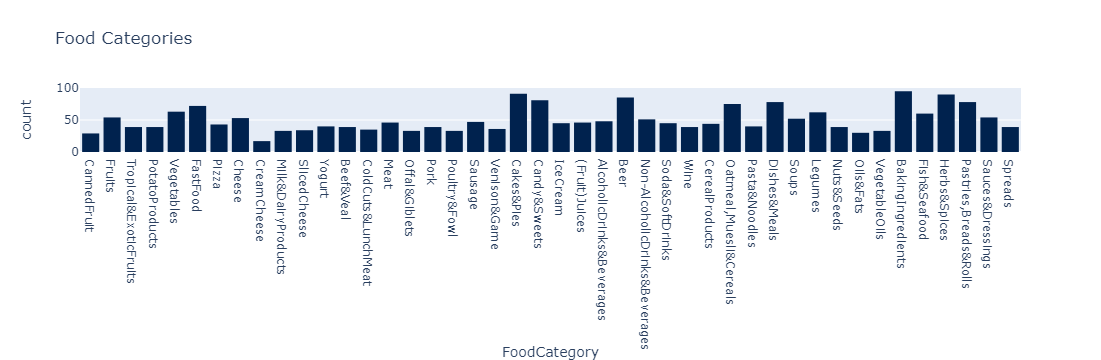

In [62]:
plt = px.histogram(df, x='FoodCategory', title='Food Categories', color_discrete_sequence=px.colors.sequential.Cividis)
plt.show()


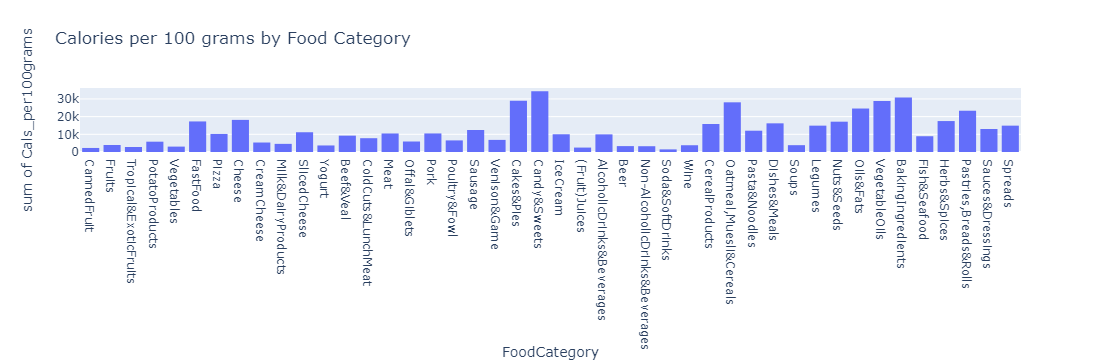

In [64]:
plt = px.histogram(df, x='FoodCategory', y ='Cals_per100grams', title='Calories per 100 grams by Food Category')
plt.show()

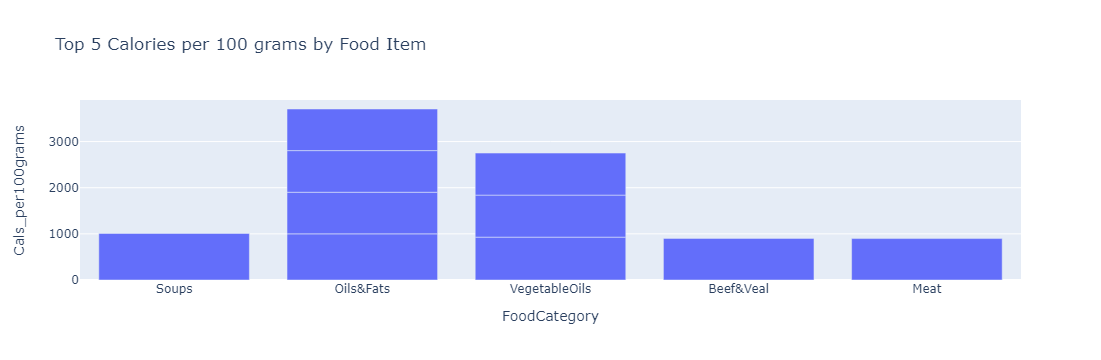

In [66]:
top_5_food_categories_cal = df.nlargest(10, 'Cals_per100grams')

plt = px.bar(top_5_food_categories_cal, x=top_5_food_categories_cal['FoodCategory'], y=top_5_food_categories_cal['Cals_per100grams'], title='Top 5 Calories per 100 grams by Food Item')
plt.show()

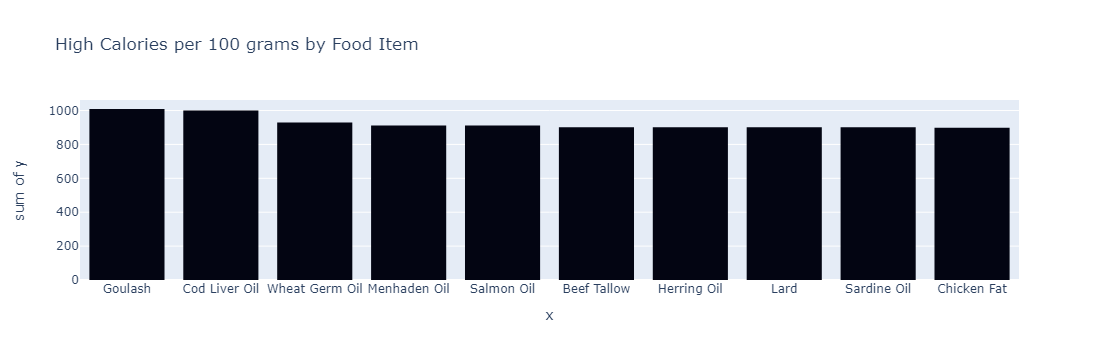

In [68]:
top_food_items = df.nlargest(10, 'Cals_per100grams')

plt = px.histogram(df, x=top_food_items['FoodItem'], y=top_food_items['Cals_per100grams'], title='High Calories per 100 grams by Food Item', color_discrete_sequence=px.colors.sequential.ice)
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



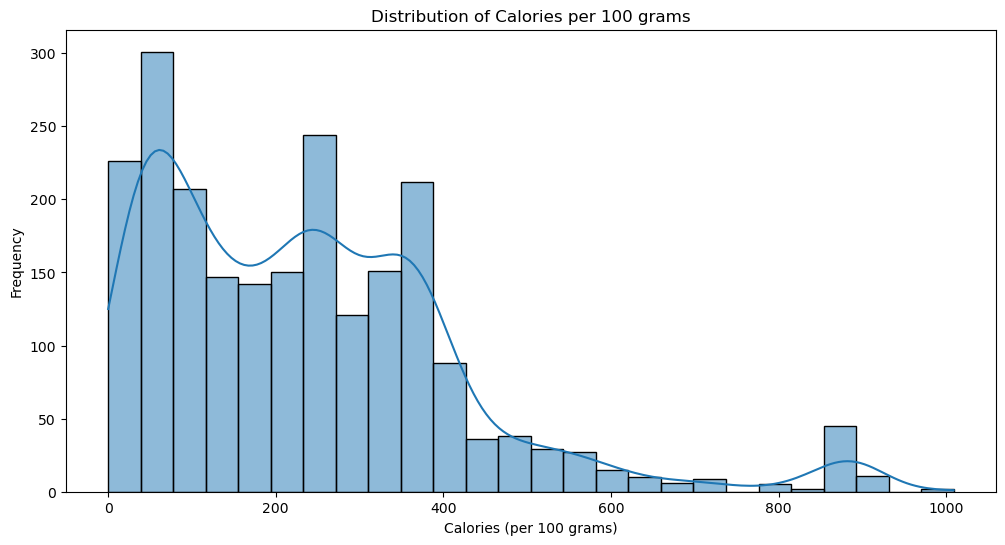

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



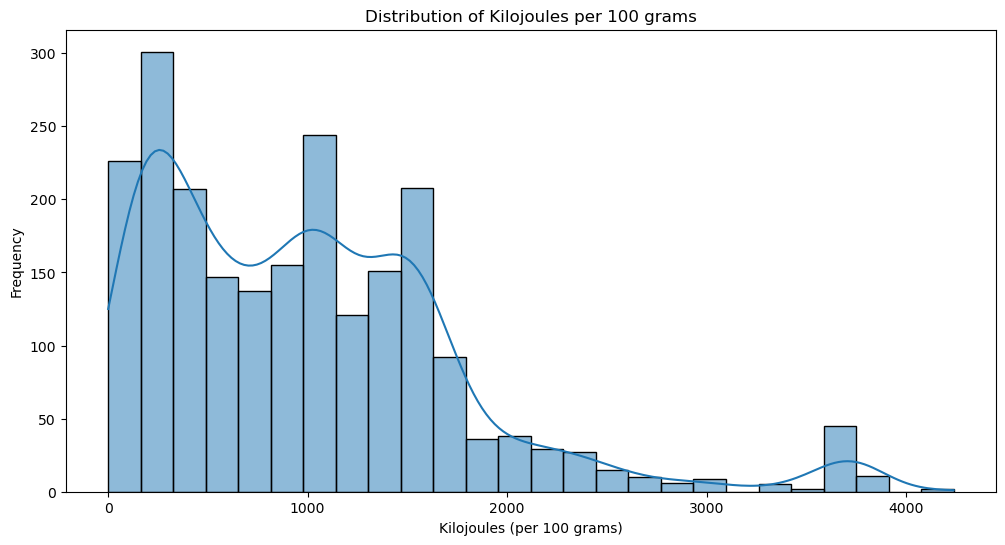

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the first histogram
plt.figure(figsize=(12, 6))  # Create a new figure with size 12x6 inches
sns.histplot(df['Cals_per100grams'], kde=True)
plt.title('Distribution of Calories per 100 grams')
plt.xlabel('Calories (per 100 grams)')
plt.ylabel('Frequency')
plt.show()

# Plotting the second histogram
plt.figure(figsize=(12, 6))  # Create a new figure with size 12x6 inches
sns.histplot(df['KJ_per100grams'], kde=True)
plt.title('Distribution of Kilojoules per 100 grams')
plt.xlabel('Kilojoules (per 100 grams)')
plt.ylabel('Frequency')
plt.show()


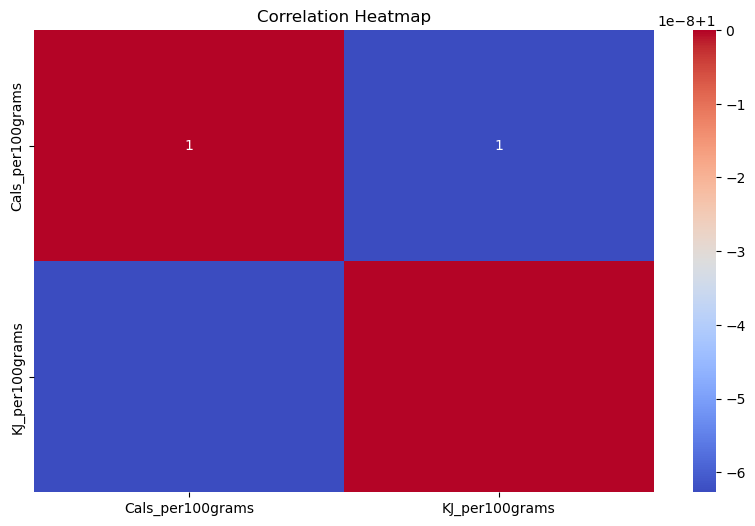

In [72]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



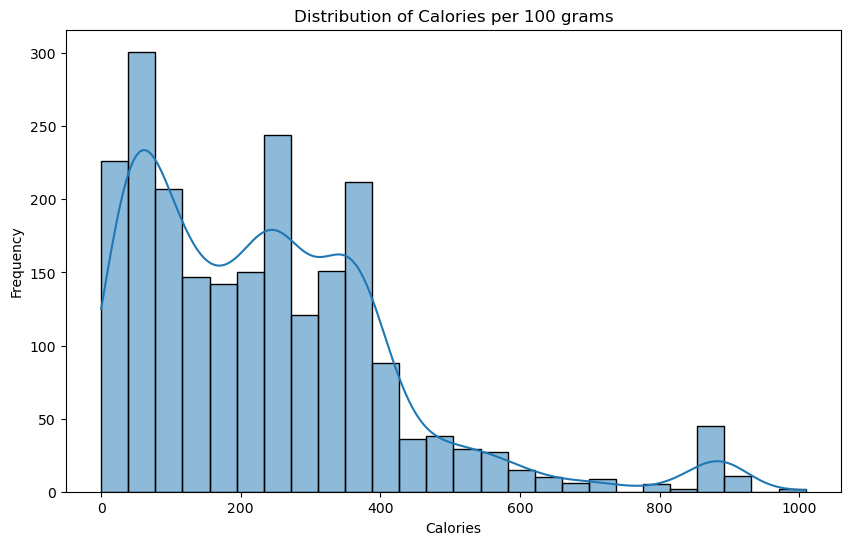

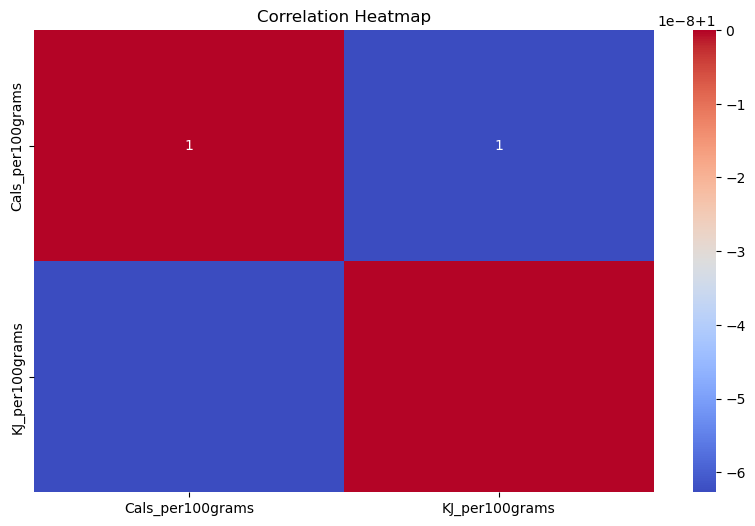

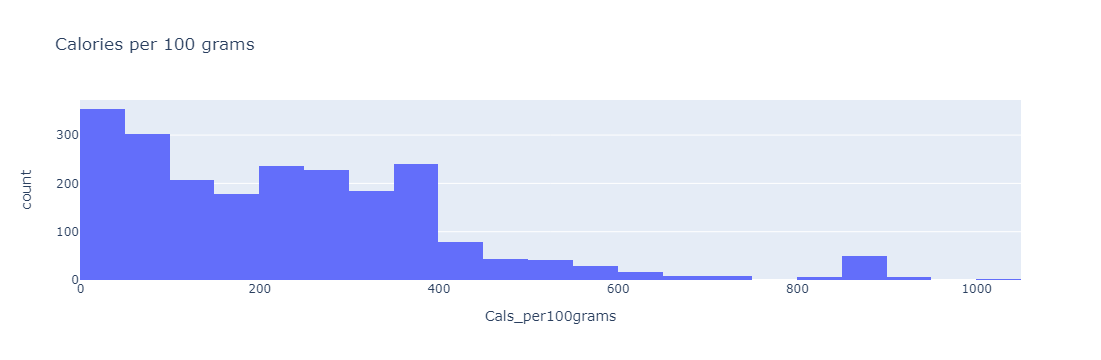

In [74]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of calories
plt.figure(figsize=(10, 6))
sns.histplot(df['Cals_per100grams'], kde=True)
plt.title('Distribution of Calories per 100 grams')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Interactive Visualization with Plotly
import plotly.express as px

fig = px.histogram(df, x='Cals_per100grams', nbins=50, title='Calories per 100 grams')
fig.show()

In [80]:
# # Step 7: User Input and Tracking
# import pandas as pd

# # Load the CSV file into a DataFrame
# csv_file_path = '/mnt/data/your_csv_file.csv'  # Update this with the correct path
# df = pd.read_csv('fooddex.csv')

# print(df.head())  

# # Function to normalize the food item names
# def normalize_food_item(name):
#     return name.strip().lower()

# # Normalize the food item names in the DataFrame
# df['FoodItem'] = df['FoodItem'].apply(normalize_food_item)

# # Remove non-numeric characters from the Cals_per100grams column
# df['Cals_per100grams'] = df['Cals_per100grams'].str.extract('(\d+)').astype(float)

# # Print the food items and calories to verify
# print(df[['FoodItem', 'Cals_per100grams']].head())

# def input_calories():
#     total_calories = 0
#     while True:
#         food_item = input("Enter food item (or type 'done' to finish): ")
#         if food_item.lower() == 'done':
#             break
#         weight = float(input("Enter the weight in grams: "))
        
#         # Normalize user input food item name
#         normalized_food_item = normalize_food_item(food_item)
        
#         # Print normalized food item for debugging
#         print(f"Checking for food item: {normalized_food_item}")
        
#         if normalized_food_item in df['FoodItem'].values:
#             cal_per_100g = df[df['FoodItem'] == normalized_food_item]['Cals_per100grams'].values[0]
#             total_calories += (cal_per_100g * weight) / 100
#         else:
#             print("Food item not found!")
    
#     print(f"Total calories consumed: {total_calories} cal")

# input_calories()

  FoodCategory             FoodItem per100grams Cals_per100grams  \
0  CannedFruit           Applesauce        100g           62 cal   
1  CannedFruit      Canned Apricots        100g           48 cal   
2  CannedFruit  Canned Blackberries        100g           92 cal   
3  CannedFruit   Canned Blueberries        100g           88 cal   
4  CannedFruit      Canned Cherries        100g           54 cal   

  KJ_per100grams  
0         260 kJ  
1         202 kJ  
2         386 kJ  
3         370 kJ  
4         227 kJ  
              FoodItem  Cals_per100grams
0           applesauce              62.0
1      canned apricots              48.0
2  canned blackberries              92.0
3   canned blueberries              88.0
4      canned cherries              54.0


Enter food item (or type 'done' to finish):  pizza
Enter the weight in grams:  200


Checking for food item: pizza


Enter food item (or type 'done' to finish):  done


Total calories consumed: 534.0 cal


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


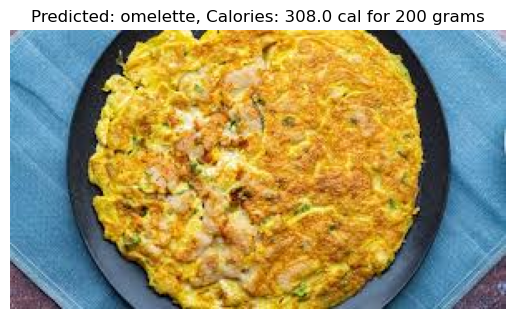

In [200]:
# Function to preprocess and predict food item class
def predict_class(model, image, food_list):
    image_resized = cv2.resize(image, (224, 224))  # Adjust size as per your model's requirement
    image_normalized = image_resized.astype('float32') / 255.0
    image_batch = np.expand_dims(image_normalized, axis=0)

    predictions = model.predict(image_batch)
    predicted_index = np.argmax(predictions, axis=1)[0]
    predicted_food_item = food_list[predicted_index]

    return predicted_food_item

# Load and prepare the image
image_path = "D:\\omlette.jpeg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Predict the food item using the model
predicted_food_item = predict_class(model_best, image_rgb, food_list)

# Load the food calorie data
csv_file_path = 'fooddex.csv'
df = pd.read_csv(csv_file_path)

# Normalize the food item names
def normalize_food_item(name):
    return name.strip().lower()

df['FoodItem'] = df['FoodItem'].apply(normalize_food_item)

# Extract numeric values from the Cals_per100grams column
df['Cals_per100grams'] = df['Cals_per100grams'].str.extract('(\d+)').astype(float)

# Function to calculate calories based on the predicted food item
def calculate_calories(food_item, weight):
    normalized_food_item = normalize_food_item(food_item)
    if normalized_food_item in df['FoodItem'].values:
        cal_per_100g = df[df['FoodItem'] == normalized_food_item]['Cals_per100grams'].values[0]
        total_calories = (cal_per_100g * weight) / 100
        return total_calories
    else:
        return "Food item not found!"

# Example usage with predicted food item
weight_in_grams = 200  # Replace with actual weight if available
calories = calculate_calories(predicted_food_item, weight_in_grams)

# Display the image and prediction results
plt.imshow(image_rgb)
plt.title(f"Predicted: {predicted_food_item}, Calories: {calories} cal for {weight_in_grams} grams")
plt.axis('off')
plt.show()
